In [26]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load the dataset

data = pd.read_csv('C:/Users/Sowmy/OneDrive/Desktop/hw2/nhis_2022.csv')

#view first few roes of the data
print(data.head())
print(data.shape)



   YEAR  SERIAL  STRATA  PSU         NHISHID  REGION  PERNUM  \
0  2022       1     143   16  0002022H000001       4       1   
1  2022       2     106   53  0002022H000003       3       1   
2  2022       2     106   53  0002022H000003       3       2   
3  2022       3     134   13  0002022H000006       2       1   
4  2022       4     106   53  0002022H000007       3       1   

            NHISPID      HHX  SAMPWEIGHT  ...  TOMSAUCEMNO  SODAPNO  FRIESPNO  \
0  0002022H00000110  H000001      8018.0  ...            2        0       110   
1  0002022H00000310  H000003     10117.0  ...            1        0         1   
2  0002022H00000320  H000003      7933.0  ...          996      996       996   
3  0002022H00000610  H000006      2681.0  ...            1        1         1   
4  0002022H00000710  H000007     10233.0  ...            3       30         5   

   SPORDRMNO  FRTDRINKMNO  COFETEAMNO  POTATONO  PIZZANO  HRSLEEP  CVDSHT  
0          3            0           0         3     

The dataset has been loades and it has 35,115 rows and 48 columns.

In [27]:
#drop survey columns
survey_cols = ['YEAR', 'SERIAL', 'STRATA', 'PSU', 'NHISHID', 'REGION',
               'PERNUM', 'NHISPID', 'HHX', 'SAMPWEIGHT', 'ASTATFLG', 'CSTATFLG']
data.drop(columns=survey_cols, inplace=True)


Since survey ID  variables are not beeing used, so dropped them from the dataset.

In [28]:
#Replace special missing codes
data.replace([996,997,998,999],np.nan,inplace=True)

# Define columns and their replacements
replace_7_9 = ['SEX', 'HINOTCOVE', 'CANCEREV', 'CHEARTDIEV', 'DIABETICEV', 'HEARTATTEV', 'STROKEV']
replace_97_98_99 = ['HOURSWRK', 'HRSLEEP']

# Replace 7 and 9 with NaN
data[replace_7_9] = data[replace_7_9].replace({7: np.nan, 9: np.nan})

# Replace 97, 98, 99 with NaN
data[replace_97_98_99] = data[replace_97_98_99].replace({97: np.nan, 98: np.nan, 99: np.nan})


Replaced 996, 997, 998,999 special codes with nan in whole dataset. But replacing 7 and 9 with Nan across the entire datset can lose real data where 7 and 9 are valid responses . So replced those 7 and 9 special codes in specific columns. Simmilarly replaced special codes 97, 98, 99 from specific columns mentioned above.

In [31]:
#define the variables. 
variables = ['AGE', 'SEX', 'BMICALC', 'HRSLEEP', 'SODAPNO','FRIESPNO', 'DIABETICEV']
data  = data[variables]
data

,AGE,SEX,BMICALC,HRSLEEP,SODAPNO,FRIESPNO,DIABETICEV
0,61.0,1.0,38.4,8.0,0.0,110.0,1.0
1,43.0,1.0,27.3,6.0,0.0,1.0,1.0
3,68.0,1.0,25.0,6.0,1.0,1.0,1.0
4,73.0,1.0,24.0,8.0,30.0,5.0,1.0
6,73.0,1.0,26.5,6.0,5.0,3.0,1.0
...,...,...,...,...,...,...,...
35106,84.0,2.0,20.7,9.0,0.0,1.0,1.0
35107,45.0,1.0,31.4,8.0,0.0,4.0,1.0
35108,47.0,2.0,36.3,8.0,0.0,1.0,1.0
35109,37.0,2.0,29.0,7.0,4.0,1.0,1.0


Defined the variables for analysis. Now dataset has 7 columns : AGE, SEX, BMICALC, HRSLEEO, SODAPNO, FRIESPNO, DIABETICEV. The question that I am working on is " "Can demographic and behavioral variables such as age, sex, BMI, sleep hours, soda consumption, and fries consumption be used to predict whether an individual has ever been diagnosed with diabetes?"



In [32]:
#drop rows with nan value
data = data.dropna(subset=['DIABETICEV']).copy()

#Impute missing values with median age.
data['AGE'] = data['AGE'].fillna(data['AGE'].median())

#Impute missing values with mode.
data['SEX'] = data['SEX'].fillna(data['SEX'].mode()[0])

#Impute missing values with median
data['HRSLEEP'] = data['HRSLEEP'].fillna(data['HRSLEEP'].median())

#Drop rows with Nan values.
data = data.dropna()

data

,AGE,SEX,BMICALC,HRSLEEP,SODAPNO,FRIESPNO,DIABETICEV
0,61.0,1.0,38.4,8.0,0.0,110.0,1.0
1,43.0,1.0,27.3,6.0,0.0,1.0,1.0
3,68.0,1.0,25.0,6.0,1.0,1.0,1.0
4,73.0,1.0,24.0,8.0,30.0,5.0,1.0
6,73.0,1.0,26.5,6.0,5.0,3.0,1.0
...,...,...,...,...,...,...,...
35106,84.0,2.0,20.7,9.0,0.0,1.0,1.0
35107,45.0,1.0,31.4,8.0,0.0,4.0,1.0
35108,47.0,2.0,36.3,8.0,0.0,1.0,1.0
35109,37.0,2.0,29.0,7.0,4.0,1.0,1.0


Cleaned the dataset by imputing missing values for age with median because it is numeric and can have more outliers. And HRSLEEP with median as it is numeric and median is more robust. Also imputed sex with mode beacuse it is categorical. Other predictors which has nan rows where dropped to maintain data integrity.

In [33]:
data['DIABETICEV'] = data['DIABETICEV'].map({1.0: 0, 2.0: 1})#1 = No diabetes, 2 = has diabetes.

#define feature variable
X = data.drop('DIABETICEV', axis=1)

#define target variable
y = data['DIABETICEV']
data

,AGE,SEX,BMICALC,HRSLEEP,SODAPNO,FRIESPNO,DIABETICEV
0,61.0,1.0,38.4,8.0,0.0,110.0,0
1,43.0,1.0,27.3,6.0,0.0,1.0,0
3,68.0,1.0,25.0,6.0,1.0,1.0,0
4,73.0,1.0,24.0,8.0,30.0,5.0,0
6,73.0,1.0,26.5,6.0,5.0,3.0,0
...,...,...,...,...,...,...,...
35106,84.0,2.0,20.7,9.0,0.0,1.0,0
35107,45.0,1.0,31.4,8.0,0.0,4.0,0
35108,47.0,2.0,36.3,8.0,0.0,1.0,0
35109,37.0,2.0,29.0,7.0,4.0,1.0,0


Converted target variables into numerical values 0 and 1 and defined my predictor and variable.

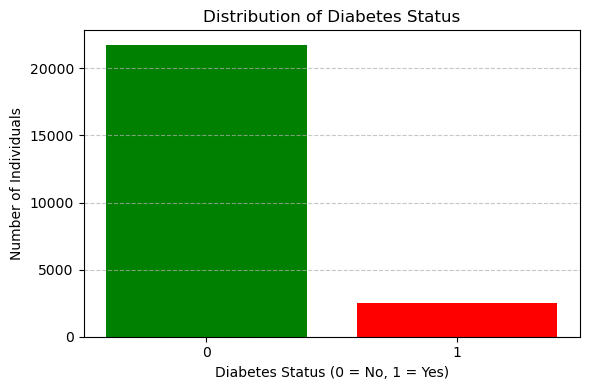

DIABETICEV
0    21744
1     2509
Name: count, dtype: int64


In [34]:
# Count the occurrences of each unique value in y
class_counts = y.value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['green', 'red'])
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Diabetes Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(class_counts)

From the above bar plot it is clear that there is class imbalance. It has more indivduals almost 21,744 with no diabetes (label 0) and has 2509 individual with diabetes. 

 Feature Distributions:



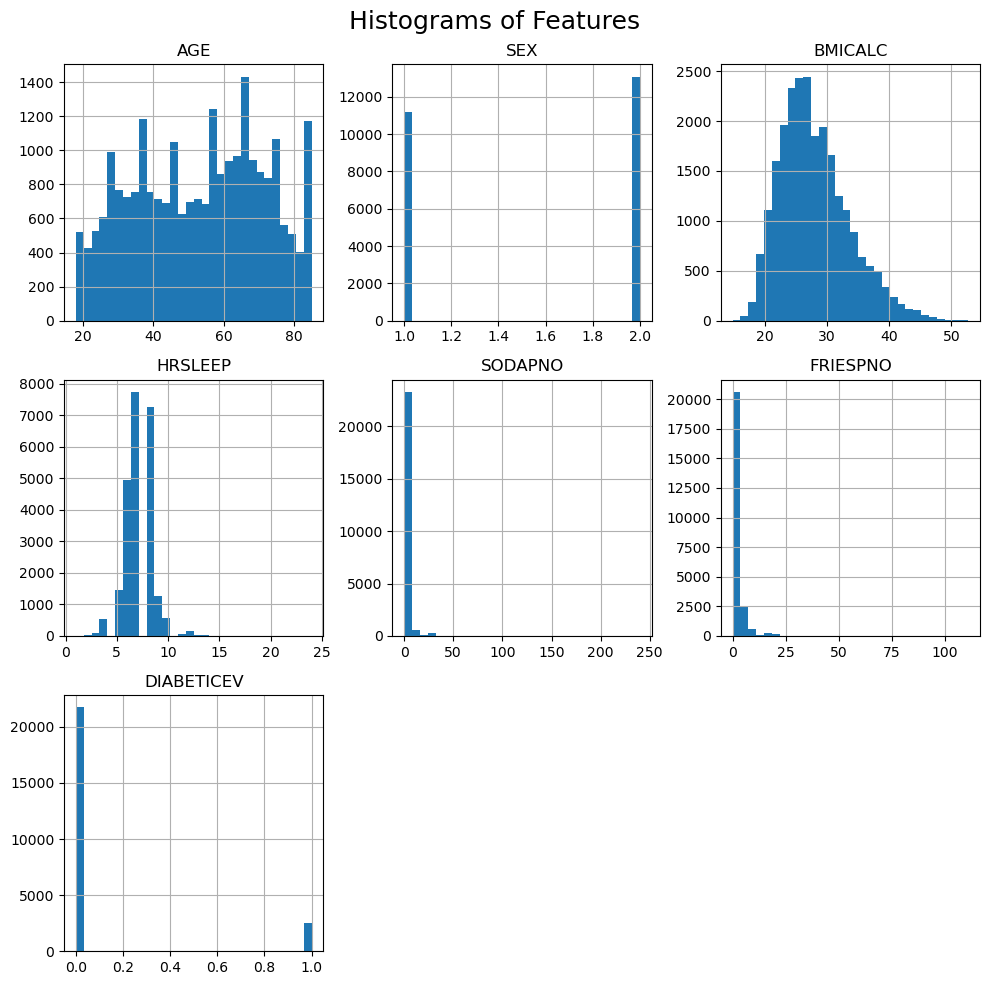

In [35]:

#  Histograms for all features
print(" Feature Distributions:\n")
data.hist(figsize=(10,10), bins=30)
plt.suptitle('Histograms of Features', fontsize=18)
plt.tight_layout()
plt.show()


From above histograms we can say that 
1. Age: Has distinct age groups with peaks around 30s, 50s and 70s.
2. SEX : It is binary categorical variable where 1 is for male ans 2 for female. The count for each sex is balanced.
3. BMIcal: It has peaks around mid 20s. It is right skewed and has higher BMI values.
4. HRSLEEP: Indivdual are mostly sleeoing 7-8 hours.
5. SODAPNO: Many indivduals here are consuming less soda.
6. FRIESPNO: shows lower frequency of fries consumption.


Checking for Outliers


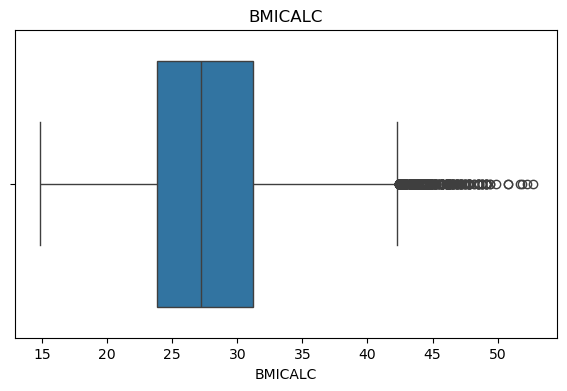

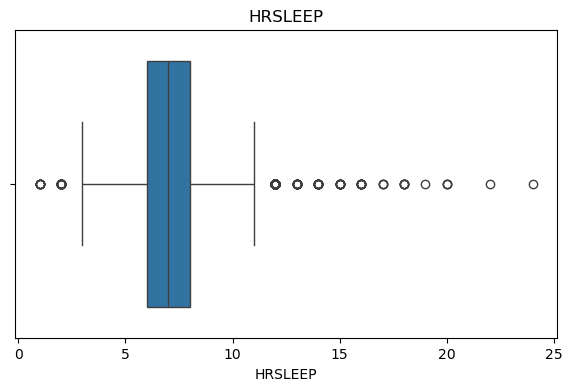

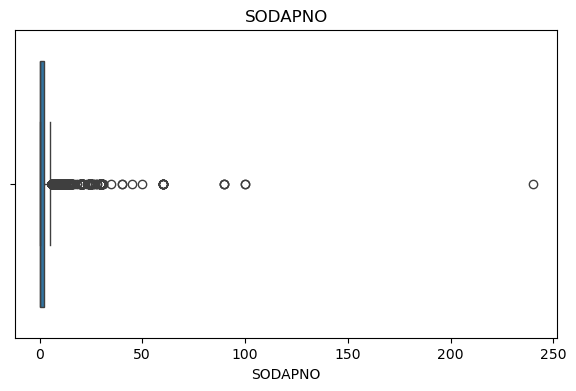

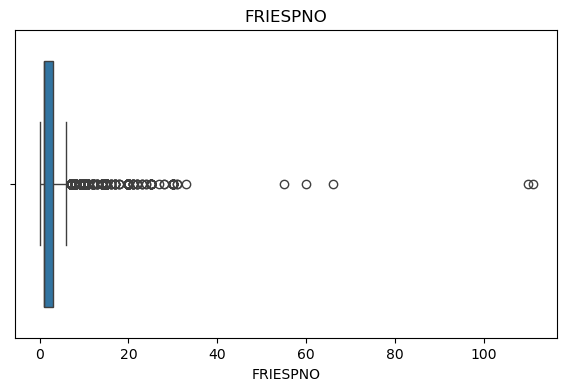

In [38]:
print("Checking for Outliers")
for col in [ 'BMICALC', 'HRSLEEP', 'SODAPNO', 'FRIESPNO']:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=data[col])
    plt.title(f'{col}')
    plt.show()


From above box plot it is clear that there are high outliers in BMICALC and FRIESPNO and outliers on both ends for HRSLEEP, SODAPNO.

Correlation Between Features:



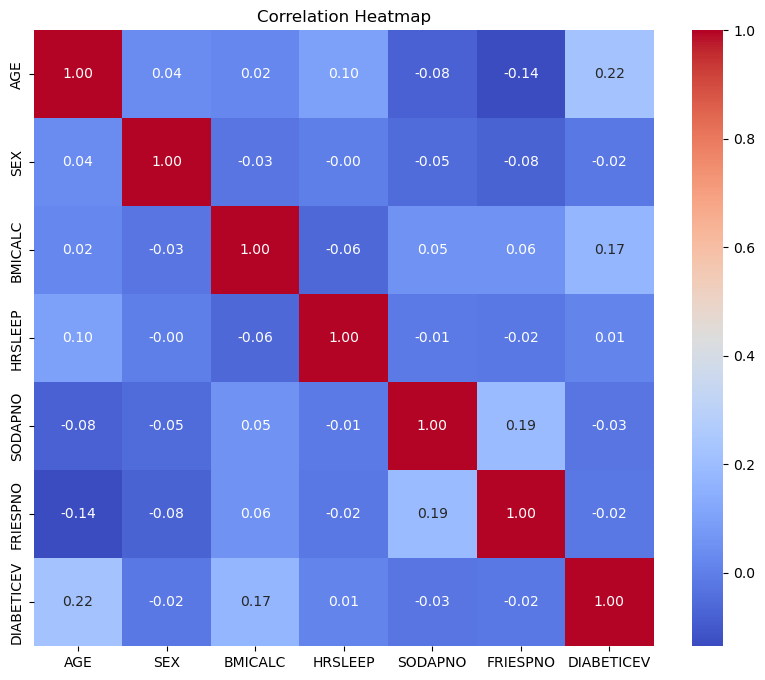

In [39]:
print("Correlation Between Features:\n")
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Based on the above heatmap, there is weal linear relationship between the predictors and target variable. AGE and BMICALC shows stronger positive correlations wiith diabetes as compared to the other features.

Hence from the above eda we can say that target varaibable is imbalance. There are some ouutliers for bmi, hours slept. The correlation with target is weak. Now lets go for modelling. 